# Queno1

In [1]:
#First of all we have to import dataset diabetes.csv

In [1]:
import pandas as pd
diabetes_file=pd.read_csv('diabetes.csv')

In [2]:
diabetes_file

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
import seaborn as sns

C:\Users\shahid jamal\Contacts\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


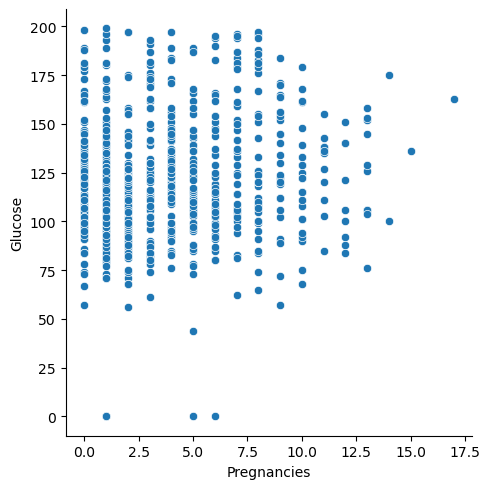

In [4]:
sns.relplot(data=diabetes_file,x='Pregnancies',y='Glucose')

In [5]:
#Here we see that glucose level does not affect no of times getting pregnant as we see in plot that higher plasma glucose 
#concentration and lower glucose does not have differentiating impact on no of times getting pregnant.

C:\Users\shahid jamal\Contacts\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


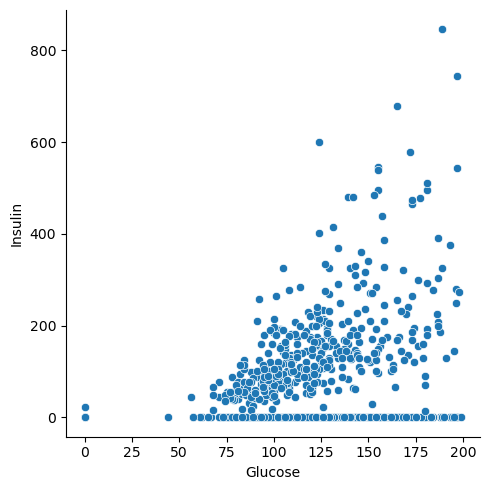

In [6]:
sns.relplot(data=diabetes_file,x='Glucose',y='Insulin')

In [7]:
#In this plot we also see that higher insulin and lower insulin doesnot have differentiating impact on glucose level.

C:\Users\shahid jamal\Contacts\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


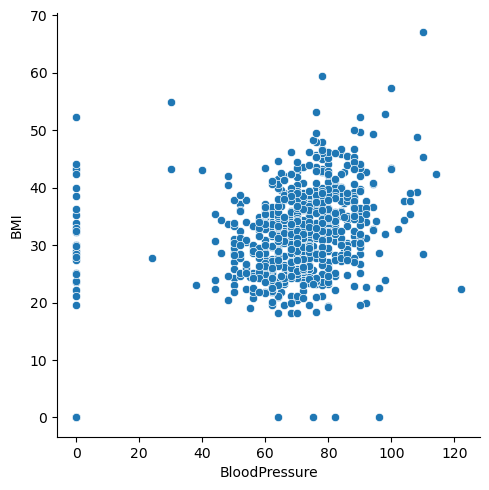

In [8]:
sns.relplot(data=diabetes_file,x='BloodPressure',y='BMI')

In [9]:
#Here also in this plot a person with higher bloodpressure may have low bmi and low bloodpressure may have high bmi which
#is the same case as in the above case.

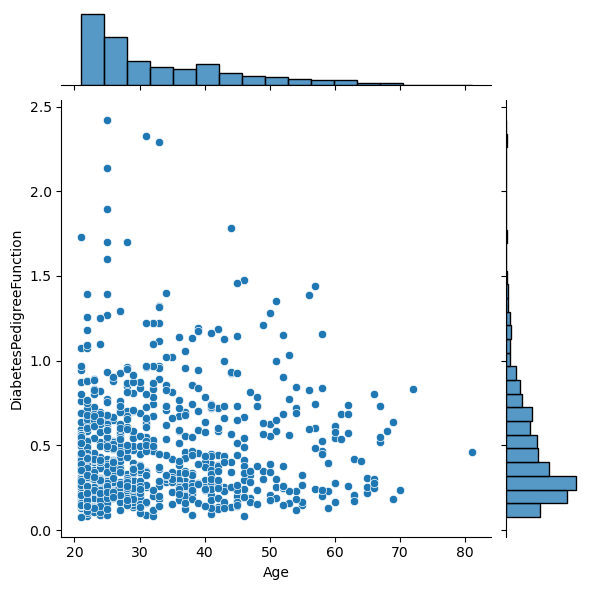

In [10]:
sns.jointplot(x='Age',y='DiabetesPedigreeFunction',data=diabetes_file)

In [11]:
#So according to this plot person having likelihood of diabetes accoding to family history of less age and elderly people
#are very less effective according to this feature.

# Queno 2

In [12]:
#For checking missing values we have to
diabetes_file.notnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
763,True,True,True,True,True,True,True,True,True
764,True,True,True,True,True,True,True,True,True
765,True,True,True,True,True,True,True,True,True
766,True,True,True,True,True,True,True,True,True


<Axes: >

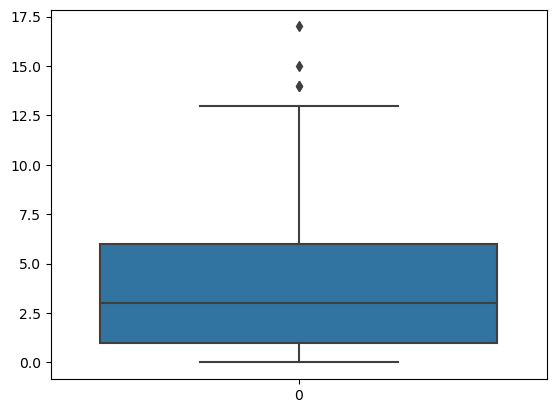

In [13]:
sns.boxplot(diabetes_file['Pregnancies'])

<Axes: >

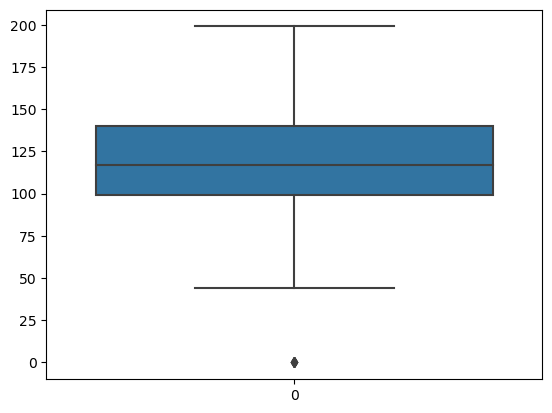

In [14]:
sns.boxplot(diabetes_file['Glucose'])

<Axes: >

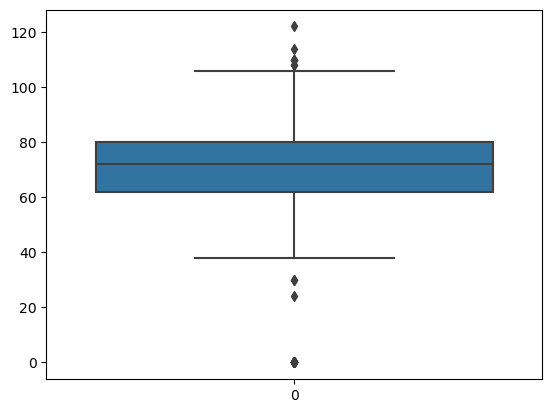

In [15]:
sns.boxplot(diabetes_file['BloodPressure'])

<Axes: >

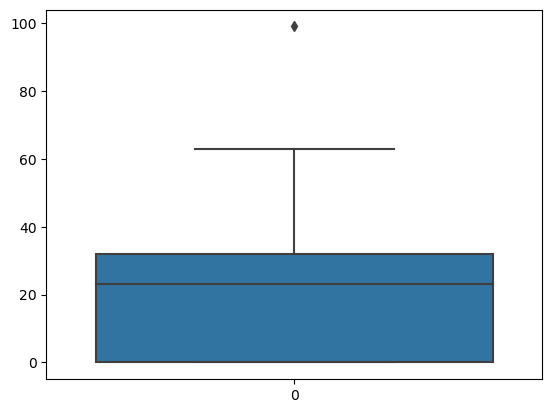

In [16]:
sns.boxplot(diabetes_file['SkinThickness'])

<Axes: >

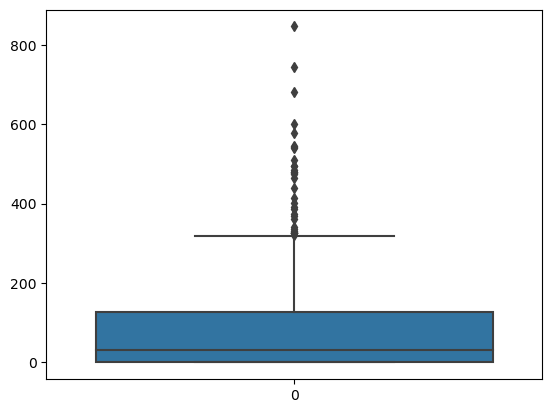

In [17]:
sns.boxplot(diabetes_file['Insulin'])

In [18]:
#So we can see that every variables has some outliers through boxplot.
import matplotlib.pyplot as plt

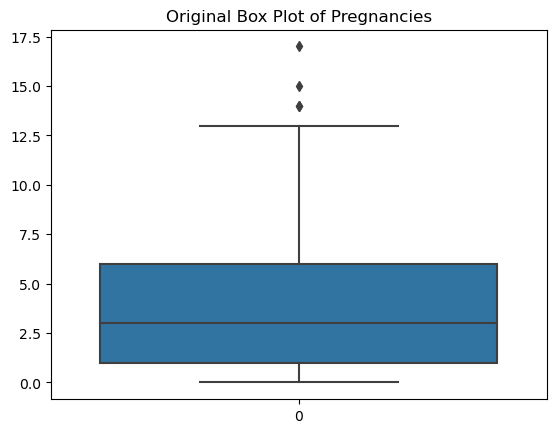

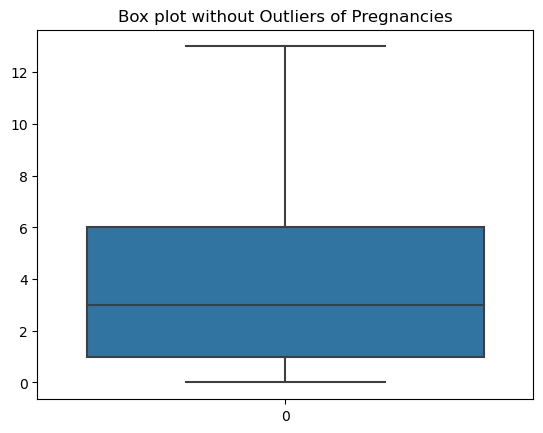

In [19]:
def removal_box_plot(df,column,threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
    removed_outliers=df[df[column]<=threshold]
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box plot without Outliers of {column}')
    plt.show()
    return removed_outliers
threshold_value=13
no_outliers=removal_box_plot(diabetes_file,'Pregnancies',threshold_value)

In [20]:
#So in this way we can remove the outliers to visualise dataset and there is not any missing values in dataset.


# Queno3

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
X=diabetes_file.iloc[:,:-1]
y=diabetes_file.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05,random_state=0)
#Here from this data variable we have to predict whether a patient has diabetes or not so we split data into y test and 
#x test ,y train and x train for which we have to take only 5% of data to be test and 95% of data as training data. 

In [23]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
40,3,180,64,25,70,34.0,0.271,26
181,0,119,64,18,92,34.9,0.725,23
354,3,90,78,0,0,42.7,0.559,21
563,6,99,60,19,54,26.9,0.497,32
399,3,193,70,31,0,34.9,0.241,25
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
192,7,159,66,0,0,30.4,0.383,36
629,4,94,65,22,0,24.7,0.148,21
559,11,85,74,0,0,30.1,0.300,35


In [24]:
y_train

40     0
181    0
354    0
563    0
399    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 729, dtype: int64

In [25]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31
103,1,81,72,18,40,26.6,0.283,24
338,9,152,78,34,171,34.2,0.893,33
588,3,176,86,27,156,33.3,1.154,52
395,2,127,58,24,275,27.7,1.600,25
204,6,103,72,32,190,37.7,0.324,55


# Queno 4

In [26]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
import math

In [27]:
diabetes_file=diabetes_file.head(20)

In [28]:
diabetes_file

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [29]:
#First of all we have to calculate entropy of dataset and then infdormation gain
def calculate_entropy(data,target_column):
    total_rows=len(data)
    target_values=data[target_column].unique()
    entropy=0
    for value in target_values:
        value_count=len(data[data[target_column]==value])
        proportion=value_count/total_rows
        entropy-=proportion*math.log2(proportion)
    return entropy
entropy_outcome=calculate_entropy(diabetes_file,'Outcome')
print(f"Entropy of the dataset:{entropy_outcome}" )

Entropy of the dataset:0.934068055375491


In [30]:
def calculate_information_gain(data,feature,target_column):
    unique_values=data[feature].unique()
    weighted_entropy=0
    for value in unique_values:
        subset=data[data[feature]==value]
        proportion=len(subset)/len(data)
        weighted_entropy+=proportion*calculate_entropy(subset,target_column)
    information_gain=entropy_outcome-weighted_entropy
    return information_gain

In [31]:
for column in diabetes_file.columns[:-1]:
    entropy=calculate_entropy(diabetes_file,column)
    information_gain=calculate_information_gain(diabetes_file,column,'Outcome')
    print(f"{column}-Entropy:{entropy:3f},Information Gain:{information_gain:.3f}")

Pregnancies-Entropy:3.103702,Information Gain:0.454
Glucose-Entropy:4.221928,Information Gain:0.834
BloodPressure-Entropy:3.684184,Information Gain:0.696
SkinThickness-Entropy:2.695462,Information Gain:0.388
Insulin-Entropy:2.419241,Information Gain:0.387
BMI-Entropy:4.321928,Information Gain:0.934
DiabetesPedigreeFunction-Entropy:4.321928,Information Gain:0.934
Age-Entropy:3.646439,Information Gain:0.696


# Queno 5

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [33]:

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
precision=precision_score(y_test,y_pred)
print("Precision:",precision)
recall=recall_score(y_test,y_pred)
print("Recall:",recall)
F1_score=f1_score(y_test,y_pred)
print("F1-score:",F1_score)

Accuracy: 0.7692307692307693
Precision: 0.6
Recall: 0.5454545454545454
F1-score: 0.5714285714285713


In [34]:
cm=confusion_matrix(y_test,y_pred)

In [35]:
cm

array([[24,  4],
       [ 5,  6]], dtype=int64)

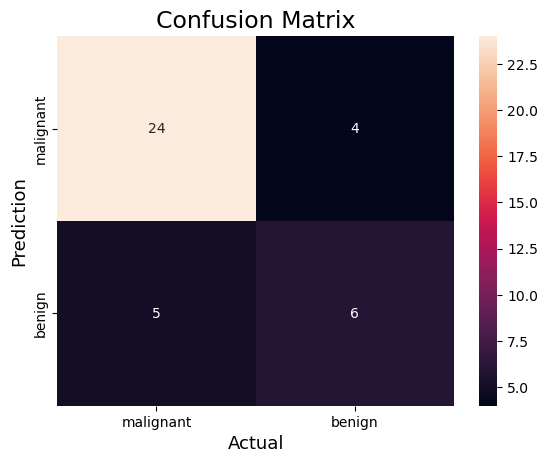

In [36]:
sns.heatmap(cm,annot=True,fmt='g',xticklabels=['malignant','benign'],yticklabels=['malignant','benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [37]:
#So in this way we are able to visualise the result using confusion matrix.

# Queno 6

In [38]:
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [39]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn import tree
%matplotlib inline
import matplotlib.pyplot as plt

[Text(0.47254509654471544, 0.9666666666666667, 'x[1] <= 127.5\ngini = 0.457\nsamples = 729\nvalue = [472, 257]'),
 Text(0.19737677845528456, 0.9, 'x[7] <= 28.5\ngini = 0.323\nsamples = 459\nvalue = [366, 93]'),
 Text(0.08460365853658537, 0.8333333333333334, 'x[5] <= 45.4\ngini = 0.159\nsamples = 253\nvalue = [231, 22]'),
 Text(0.056402439024390245, 0.7666666666666667, 'x[5] <= 30.95\ngini = 0.141\nsamples = 249\nvalue = [230, 19]'),
 Text(0.024390243902439025, 0.7, 'x[0] <= 7.5\ngini = 0.028\nsamples = 140\nvalue = [138, 2]'),
 Text(0.016260162601626018, 0.6333333333333333, 'x[6] <= 0.672\ngini = 0.014\nsamples = 139\nvalue = [138, 1]'),
 Text(0.008130081300813009, 0.5666666666666667, 'gini = 0.0\nsamples = 124\nvalue = [124, 0]'),
 Text(0.024390243902439025, 0.5666666666666667, 'x[6] <= 0.697\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.016260162601626018, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.032520325203252036, 0.5, 'gini = 0.0\nsamples = 14\nvalue = [1

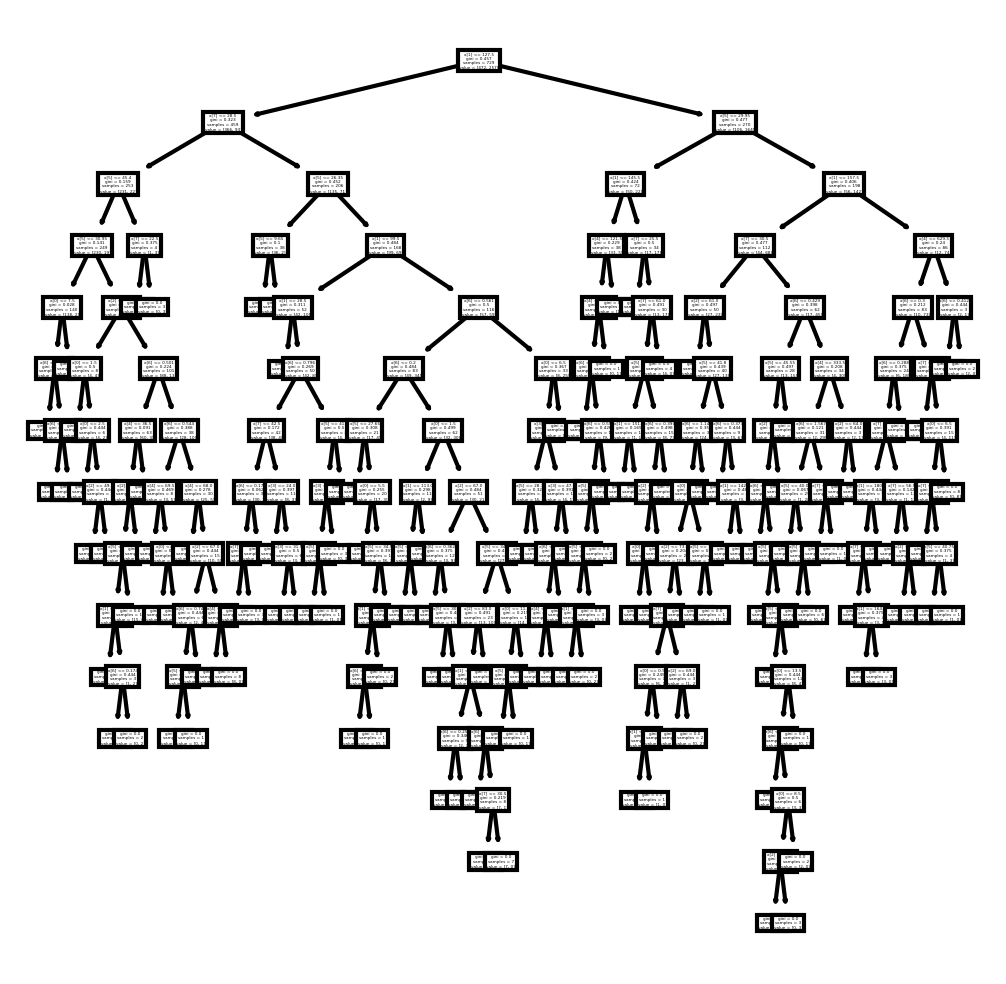

In [40]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(clf)


[Text(0.47254509654471544, 0.9666666666666667, 'Glucose <= 127.5\ngini = 0.457\nsamples = 729\nvalue = [472, 257]'),
 Text(0.19737677845528456, 0.9, 'Age <= 28.5\ngini = 0.323\nsamples = 459\nvalue = [366, 93]'),
 Text(0.08460365853658537, 0.8333333333333334, 'BMI <= 45.4\ngini = 0.159\nsamples = 253\nvalue = [231, 22]'),
 Text(0.056402439024390245, 0.7666666666666667, 'BMI <= 30.95\ngini = 0.141\nsamples = 249\nvalue = [230, 19]'),
 Text(0.024390243902439025, 0.7, 'Pregnancies <= 7.5\ngini = 0.028\nsamples = 140\nvalue = [138, 2]'),
 Text(0.016260162601626018, 0.6333333333333333, 'DiabetesPedigreeFunction <= 0.672\ngini = 0.014\nsamples = 139\nvalue = [138, 1]'),
 Text(0.008130081300813009, 0.5666666666666667, 'gini = 0.0\nsamples = 124\nvalue = [124, 0]'),
 Text(0.024390243902439025, 0.5666666666666667, 'DiabetesPedigreeFunction <= 0.697\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.016260162601626018, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.032520325203252

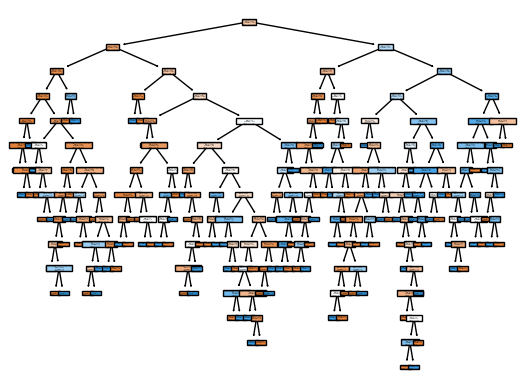

In [41]:
fn=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
tree.plot_tree(clf,feature_names=fn,filled=True)


In [42]:
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn.feature_selection import SelectFromModel
importances=clf.feature_importances_
threshold=0.1
selected_features=X.columns[importances>threshold]
X_train_selected=X_train[selected_features]
X_test_selected=X_test[selected_features]

In [43]:
clf_selected=DecisionTreeClassifier()
clf_selected.fit(X_train_selected,y_train)

DecisionTreeClassifier()

In [45]:
y_pred_all_features=clf.predict(X_test)
accuracy_all_features=accuracy_score(y_test,y_pred_all_features)
print(f"Accuracy with all features:{accuracy_all_features}")
y_pred_selected_features=clf_selected.predict(X_test_selected)
accuracy_selected_features=accuracy_score(y_test,y_pred_selected_features)
print(f"Accuracy with selected features:{accuracy_selected_features}")

Accuracy with all features:0.8205128205128205
Accuracy with selected features:0.7948717948717948


In [ ]:
#So in these case we can see that every feature in model is important as model with all features achieved an accuracy of 
#82% and model with feature selection achieved less accuracy that is 79%.